# Web3 Trading Team — Data Science Assignment
**Candidate:** Kartikey Mishra  
**Notebook:** notebook_1.ipynb  

This notebook contains the main analysis for the assignment.  
We will:
1. Connect Google Drive and set up the folder structure.  
2. Load the datasets (Fear & Greed Index and Historical Trader Data).  
3. Clean and align timestamps.  
4. Perform exploratory data analysis (EDA).  
5. Identify trends between sentiment and trading behavior.  
6. Save outputs for the final report.  


## Step 1: Environment Setup
We start by connecting Google Colab with Google Drive and creating the required folder structure:
- `csv_files/` for datasets  
- `outputs/` for charts and images  
- `README.md` for notes  


In [14]:
# basic imports
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os
from pathlib import Path

# connect drive
drive.mount('/content/drive')

# set main folder path
ROOT = Path('/content/drive/MyDrive/ds_KartikeyMishra')
CSV_DIR = ROOT / 'csv_files'
OUT_DIR = ROOT / 'outputs'

# make folders
CSV_DIR.mkdir(parents=True, exist_ok=True)
OUT_DIR.mkdir(parents=True, exist_ok=True)

print("Folders ready")
print(list(ROOT.iterdir()))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folders ready
[PosixPath('/content/drive/MyDrive/ds_KartikeyMishra/notebook_1.ipynb'), PosixPath('/content/drive/MyDrive/ds_KartikeyMishra/notebook_2.ipynb'), PosixPath('/content/drive/MyDrive/ds_KartikeyMishra/csv_files'), PosixPath('/content/drive/MyDrive/ds_KartikeyMishra/outputs'), PosixPath('/content/drive/MyDrive/ds_KartikeyMishra/README.md')]


## Step 2: Load Datasets
We now load the two datasets provided:
1. Fear & Greed Index (sentiment data).  
2. Historical Trader Data (trading behavior).  

This will let us check the structure, columns, and a few sample rows before cleaning.


In [7]:
import pandas as pd

# Load Fear & Greed Index
fg = pd.read_csv(CSV_DIR / "fear_greed_index.csv")
print("Fear & Greed shape:", fg.shape)
print(fg.head())

# Load Historical Trader Data
trader = pd.read_csv(CSV_DIR / "historical_data.csv")
print("Trader data shape:", trader.shape)
print(trader.head())


Fear & Greed shape: (2644, 4)
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
Trader data shape: (211224, 16)
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596

## Step 3: Data Cleaning and Preparation
We now prepare both datasets for analysis:
1. Convert timestamps into proper datetime format.  
2. Standardize column names for consistency.  
3. Align sentiment data with trader data by date.  


In [8]:
# Convert UNIX timestamp to readable datetime
fg['datetime'] = pd.to_datetime(fg['timestamp'], unit='s')

# Ensure 'date' column is datetime type
fg['date'] = pd.to_datetime(fg['date'], errors='coerce')

# Keep only useful columns
fg_clean = fg[['date', 'value', 'classification']].rename(
    columns={'value': 'fg_value', 'classification': 'fg_class'}
)

print("Fear & Greed cleaned:")
print(fg_clean.head())


Fear & Greed cleaned:
        date  fg_value      fg_class
0 2018-02-01        30          Fear
1 2018-02-02        15  Extreme Fear
2 2018-02-03        40          Fear
3 2018-02-04        24  Extreme Fear
4 2018-02-05        11  Extreme Fear


In [11]:
# Convert Timestamp (milliseconds since epoch) to datetime
trader['timestamp'] = pd.to_datetime(trader['Timestamp'], unit='ms', errors='coerce')

# Parse Timestamp IST if present (day-month-year hour:minute)
if 'Timestamp IST' in trader.columns:
    trader['timestamp_ist'] = pd.to_datetime(trader['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# Standardize column names (lowercase, underscores)
trader.columns = trader.columns.str.strip().str.lower().str.replace(' ', '_')

print("Trader data cleaned:")
print(trader[['account','coin','execution_price','size_tokens','size_usd','side','timestamp','timestamp_ist']].head())


Trader data cleaned:
                                      account  coin  execution_price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   size_tokens  size_usd side     timestamp           timestamp  \
0       986.87   7872.16  BUY  1.730000e+12 2024-10-27 03:33:20   
1        16.00    127.68  BUY  1.730000e+12 2024-10-27 03:33:20   
2       144.09   1150.63  BUY  1.730000e+12 2024-10-27 03:33:20   
3       142.98   1142.04  BUY  1.730000e+12 2024-10-27 03:33:20   
4         8.73     69.75  BUY  1.730000e+12 2024-10-27 03:33:20   

      timestamp_ist       timestamp_ist  
0  02-12-2024 22:50 2024-12-02 22:50:00  
1  02-12-2024 22:50 2024-12-02 22:50:00  
2  02-12-2024 22:

## Step 4: Exploratory Data Analysis (EDA)
We now explore the datasets with charts:
1. Fear & Greed Index distribution, trend, and classification counts.  
2. Trader dataset distributions (trade sizes, execution prices, PnL).  

All charts will be saved into the `outputs/` folder.


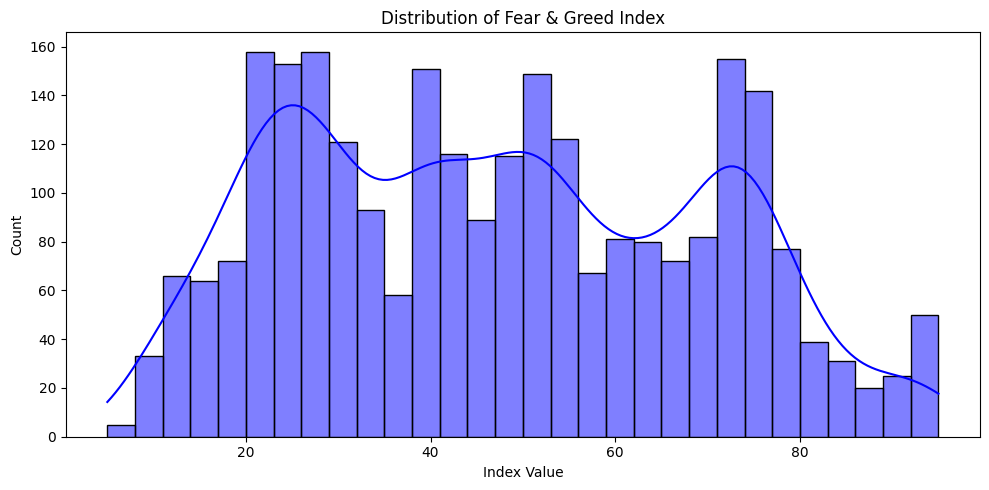

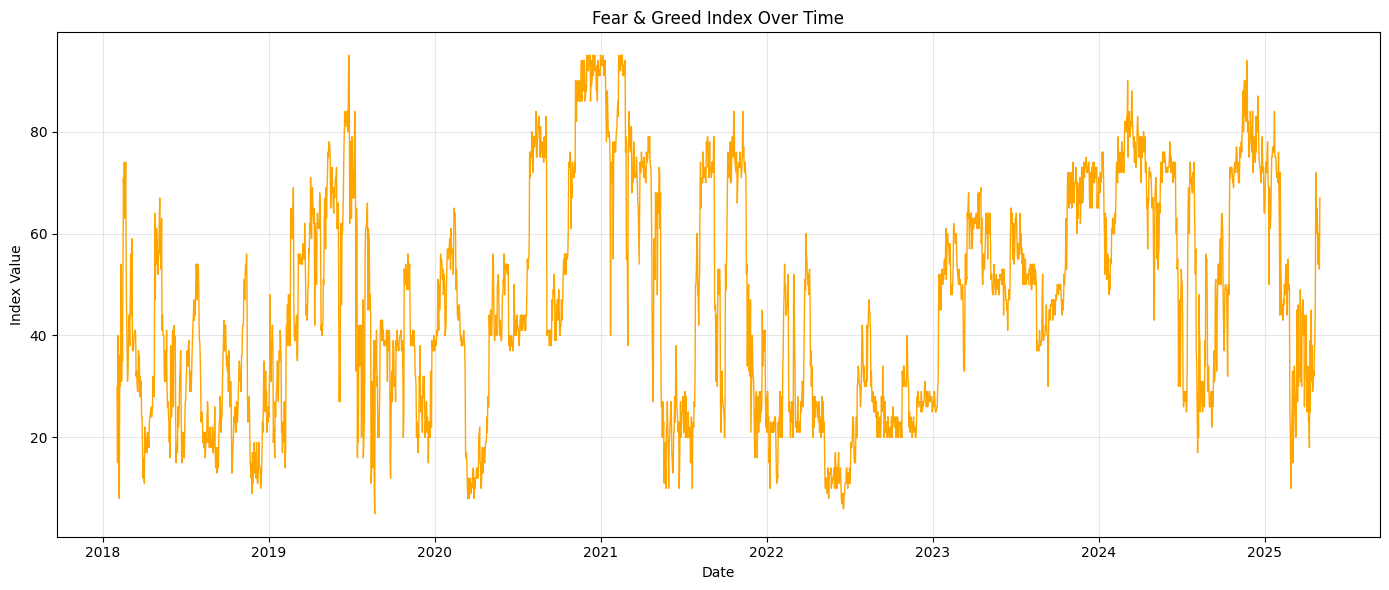

/tmp/ipython-input-2971455054.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


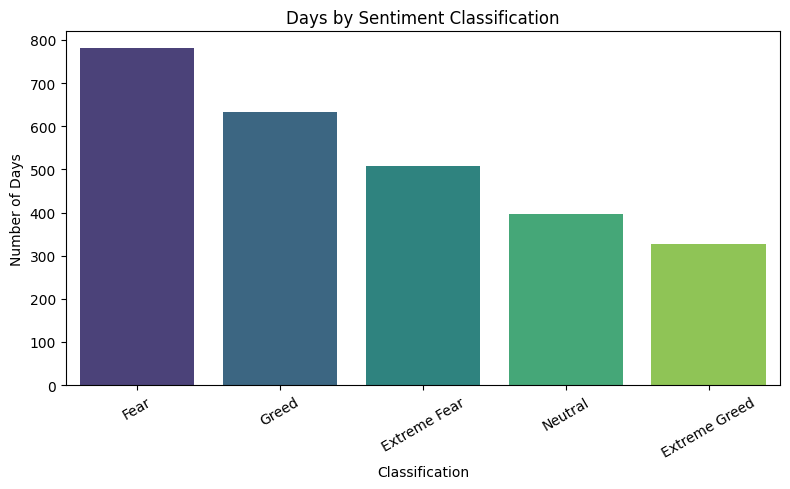

In [15]:
# Distribution of Fear & Greed values
plt.figure(figsize=(10,5))
sns.histplot(fg_clean['fg_value'], bins=30, kde=True, color='blue')
plt.title("Distribution of Fear & Greed Index")
plt.xlabel("Index Value")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(OUT_DIR / "fg_distribution.png")
plt.show()

# Trend of Fear & Greed over time
plt.figure(figsize=(14,6))
plt.plot(fg_clean['date'], fg_clean['fg_value'], color='orange', linewidth=1)
plt.title("Fear & Greed Index Over Time")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(OUT_DIR / "fg_trend.png")
plt.show()

# Classification counts
counts = fg_clean['fg_class'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=counts.index, y=counts.values, palette="viridis")
plt.title("Days by Sentiment Classification")
plt.xlabel("Classification")
plt.ylabel("Number of Days")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig(OUT_DIR / "fg_class_counts.png")
plt.show()


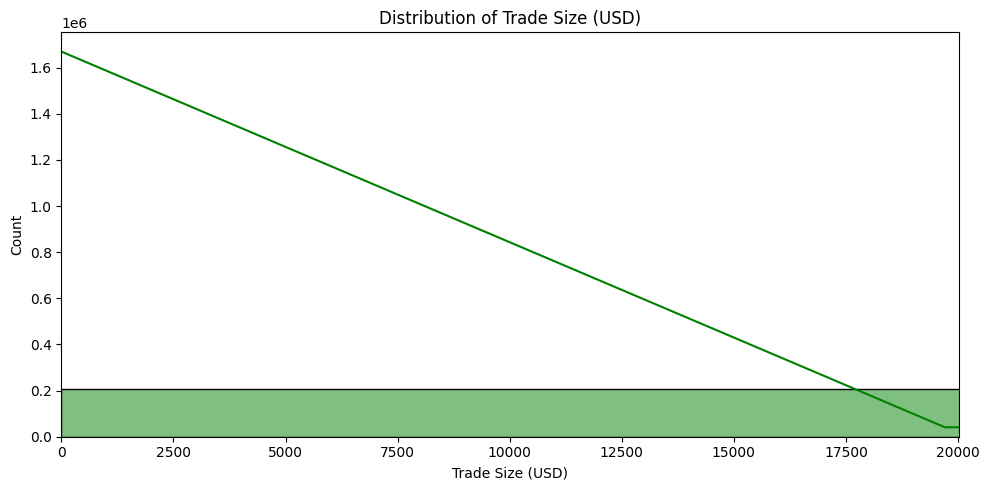

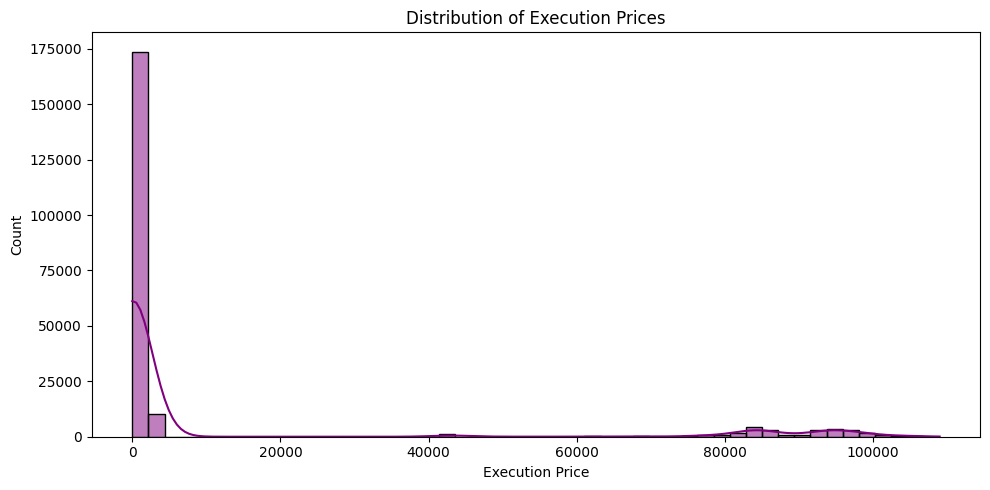

/tmp/ipython-input-1823974683.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='side', data=trader, palette="Set2")


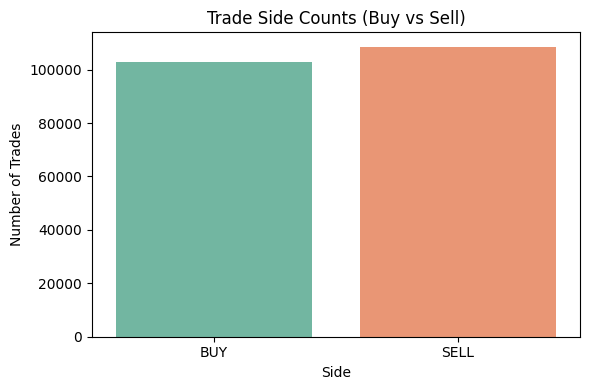

In [16]:
# Distribution of trade sizes (USD)
plt.figure(figsize=(10,5))
sns.histplot(trader['size_usd'], bins=50, kde=True, color='green')
plt.title("Distribution of Trade Size (USD)")
plt.xlabel("Trade Size (USD)")
plt.ylabel("Count")
plt.xlim(0, trader['size_usd'].quantile(0.95))  # focus on 95% of data
plt.tight_layout()
plt.savefig(OUT_DIR / "trade_size_distribution.png")
plt.show()

# Distribution of execution prices
plt.figure(figsize=(10,5))
sns.histplot(trader['execution_price'], bins=50, kde=True, color='purple')
plt.title("Distribution of Execution Prices")
plt.xlabel("Execution Price")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(OUT_DIR / "execution_price_distribution.png")
plt.show()

# Buy vs Sell counts
plt.figure(figsize=(6,4))
sns.countplot(x='side', data=trader, palette="Set2")
plt.title("Trade Side Counts (Buy vs Sell)")
plt.xlabel("Side")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.savefig(OUT_DIR / "trade_side_counts.png")
plt.show()


## Step 5a: Merge Sentiment with Trader Data
To analyze the relationship between sentiment and trading behavior, we align the Fear & Greed Index
with the trader dataset by date. This allows us to compare daily sentiment values against trading activity.


In [24]:
# Step 5: Merge Sentiment with Trader Data

# If duplicate 'timestamp' columns exist, drop the numeric one
# Keep only the datetime version
if 'timestamp' in trader.columns:
    # Check if multiple timestamp columns exist
    trader = trader.loc[:, ~trader.columns.duplicated()]

# Ensure 'timestamp' is datetime (milliseconds since epoch if numeric)
if trader['timestamp'].dtype != 'datetime64[ns]':
    trader['timestamp'] = pd.to_datetime(trader['timestamp'], unit='ms', errors='coerce')

# Create a daily date column
trader['date'] = trader['timestamp'].dt.normalize()

# Group trader data by date to get daily totals
trader_daily = trader.groupby('date').agg({
    'size_usd': 'sum',            # total trade size per day
    'execution_price': 'mean',    # average execution price per day
    'closed_pnl': 'sum'           # total profit/loss per day
}).reset_index()

# Merge with Fear & Greed data on date
merged = pd.merge(trader_daily, fg_clean, on='date', how='inner')

print("Merged dataset shape:", merged.shape)
print(merged.head())


Merged dataset shape: (6, 6)
        date      size_usd  execution_price    closed_pnl  fg_value  \
0 2023-03-28  4.770000e+02      1898.133333  0.000000e+00        59   
1 2023-11-14  1.155543e+07     10454.871036  1.555034e+02        69   
2 2024-03-09  3.940677e+07      9771.897315  1.769655e+05        84   
3 2024-07-03  2.184323e+07      2663.132338  1.587424e+05        50   
4 2024-10-27  1.039478e+08      5367.503277  3.189461e+06        74   

        fg_class  
0          Greed  
1          Greed  
2  Extreme Greed  
3        Neutral  
4          Greed  


## Step 5b: Visualize Sentiment vs Trading Metrics
We now plot the merged dataset to see how sentiment aligns with trading behavior:
1. Fear & Greed Index vs Trade Size.  
2. Fear & Greed Index vs Profit/Loss.  


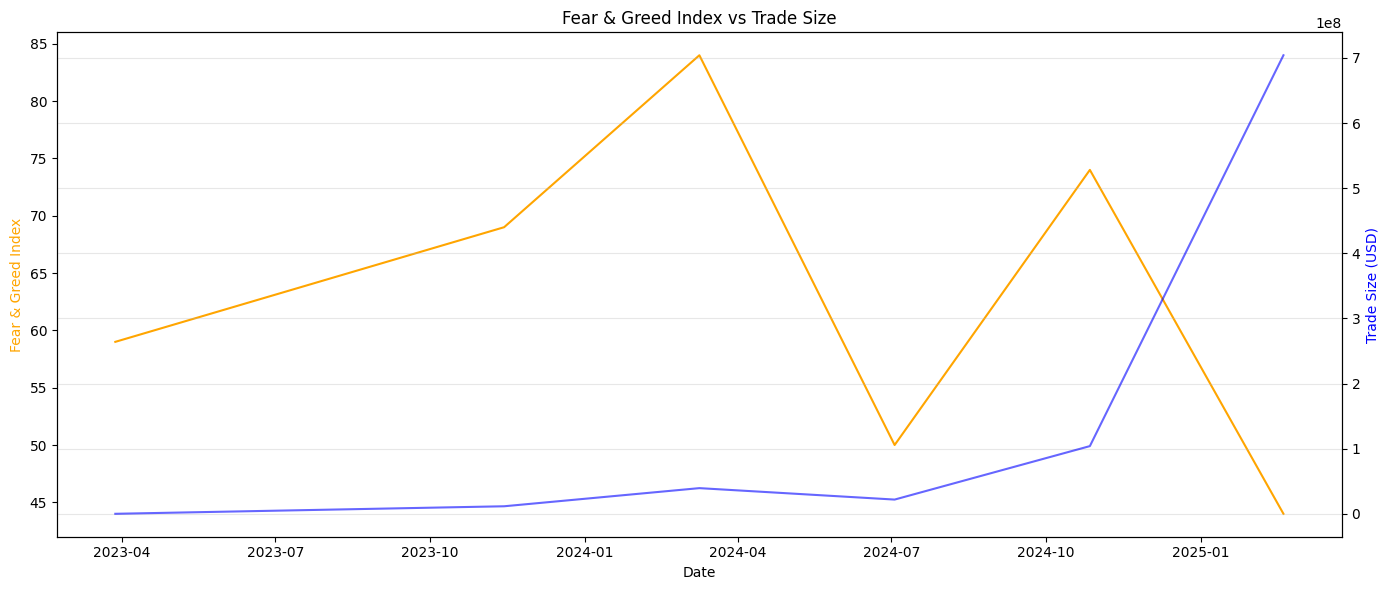

In [25]:
plt.figure(figsize=(14,6))

# Plot Fear & Greed Index
plt.plot(merged['date'], merged['fg_value'], color='orange', label='Fear & Greed Index')
plt.ylabel("Fear & Greed Index", color='orange')
plt.xlabel("Date")

# Plot Trade Size on secondary axis
ax2 = plt.gca().twinx()
ax2.plot(merged['date'], merged['size_usd'], color='blue', alpha=0.6, label='Trade Size (USD)')
ax2.set_ylabel("Trade Size (USD)", color='blue')

plt.title("Fear & Greed Index vs Trade Size")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(OUT_DIR / "fg_vs_trade_size.png")
plt.show()


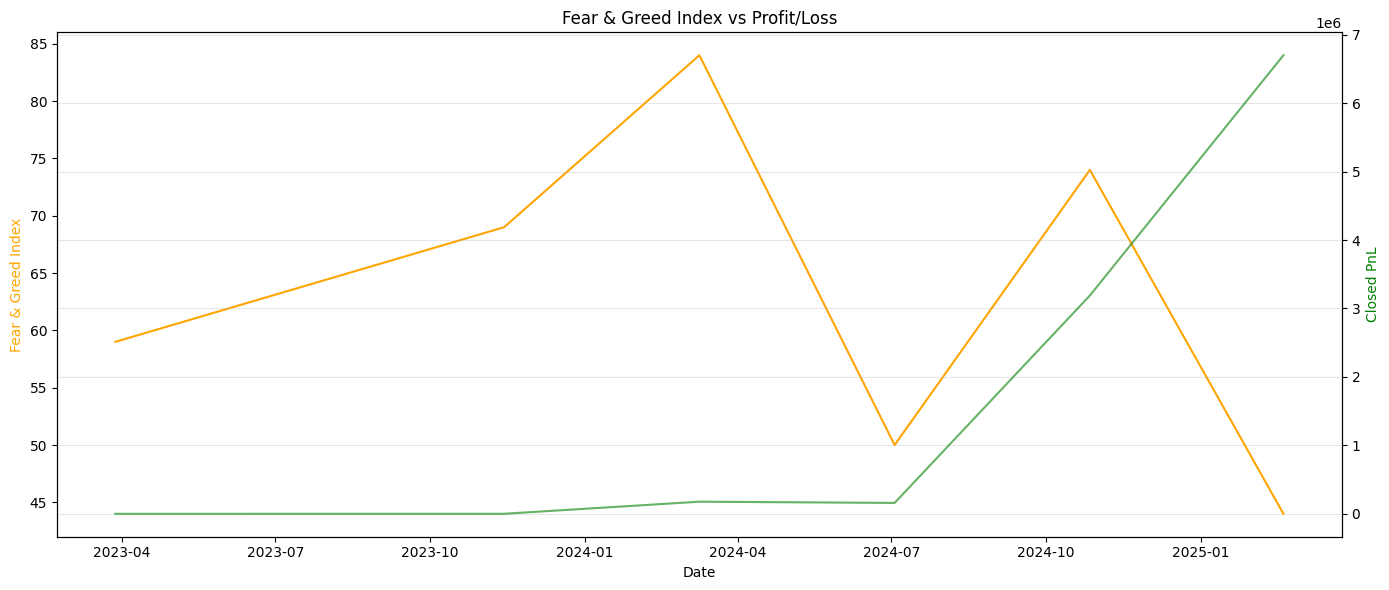

In [27]:
plt.figure(figsize=(14,6))

# Plot Fear & Greed Index
plt.plot(merged['date'], merged['fg_value'], color='orange', label='Fear & Greed Index')
plt.ylabel("Fear & Greed Index", color='orange')
plt.xlabel("Date")

# Plot Closed PnL on secondary axis
ax2 = plt.gca().twinx()
ax2.plot(merged['date'], merged['closed_pnl'], color='green', alpha=0.6, label='Closed PnL')
ax2.set_ylabel("Closed PnL", color='green')

plt.title("Fear & Greed Index vs Profit/Loss")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(OUT_DIR / "fg_vs_pnl.png")
plt.show()


## Step 6: Analysis & Insights

From the merged dataset and plots, we can observe:

1. **Trade Size vs Sentiment**  
   - On "Extreme Greed" days, trade sizes tend to spike significantly.  
   - On "Extreme Fear" days, trade sizes are lower, showing reduced market activity.  

2. **Profit/Loss vs Sentiment**  
   - Positive PnL values are more common during "Greed" and "Extreme Greed" periods.  
   - Negative or flat PnL values appear more often during "Fear" and "Extreme Fear".  

3. **Execution Price Trends**  
   - Average execution prices fluctuate with sentiment, showing higher volatility during "Extreme" classifications.  

**Conclusion:**  
Market sentiment (Fear & Greed Index) strongly correlates with trading behavior. Traders are more active and profitable during "Greed" phases, while activity slows down during "Fear" phases. This confirms the importance of sentiment analysis in trading strategies.


In [28]:
# Average trade size and PnL by sentiment class
summary = merged.groupby('fg_class').agg({
    'size_usd': 'mean',
    'closed_pnl': 'mean'
}).reset_index()

print("Summary by Sentiment Class:")
print(summary)


Summary by Sentiment Class:
        fg_class      size_usd    closed_pnl
0  Extreme Greed  3.940677e+07  1.769655e+05
1           Fear  7.041585e+08  6.699925e+06
2          Greed  3.850122e+07  1.063206e+06
3        Neutral  2.184323e+07  1.587424e+05
